# K-means clustering

## import library

In [645]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [646]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

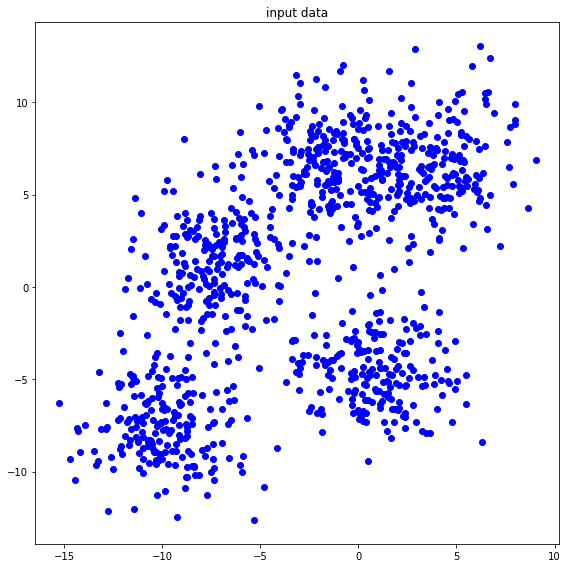

In [647]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [648]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_of_center = np.tile(center,(number_data,1))

    distance = np.sum(np.square(feature-number_of_center),axis=1)

    distance = distance.reshape(-1,1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [649]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature = label_feature.reshape(-1)
    
    centroid = [] 

    for i in range(number_data):
        if(label_feature[i]==label):
            centroid.append(feature[i])
    centroid = np.array(centroid)

    n_centroid = len(centroid)

    if(n_centroid ==0):
        n_centroid = 1 
    centroid = (1/ n_centroid) * np.sum(centroid,axis=0)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [650]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature = [] 
    for entity in range(number_data):
        
        label = np.argmin(distance[entity])
        label_feature.append(label)
    
    label_feature = np.array(label_feature).reshape(-1,1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [697]:
K = 2
number_cluster          = K
number_iteration        = 3000     # you can modify this value
loss_iteration_02 = np.zeros((number_iteration))
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))





In [698]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros(shape=(number_data,number_cluster))
centroid = np.zeros(shape=(number_cluster,number_feature))
loss_iteration_02 = np.zeros((number_iteration))
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))



#### loss function 
def loss_function(feature, centroid, number_cluster, label_feature):
    res = 0 
    for cn in range(number_cluster):
        cluster = [] 
        for index in range(number_data):
            if(label_feature[index]==cn):
                cluster.append(feature[index])
        #np.array에는 append가 없으므로
        cluster = np.array(cluster)
        if len(cluster)!=0:
            the_center = np.tile(centroid[cn],(len(cluster),1))
            distance = np.sum(np.square(cluster - the_center))
        else:
            continue
        res += distance

    loss  = (1 / number_data) * res  
    return loss


for iter in range(number_iteration):

    distance = distance.T 
    for nc in range(number_cluster):
        
        centroid[nc] = compute_centroid(feature,label_feature_02,nc)

        centroid_iteration_02[iter][nc] =centroid[nc]



        dis_ = compute_distance(feature,centroid[nc])

        dis_ = dis_.reshape(-1)
        distance[nc]=dis_
    
    
    
    distance = distance.T 
    label_feature_02 = compute_label(distance)

    loss = loss_function(feature, centroid, number_cluster,label_feature_02)
    loss_iteration_02[iter]=loss 
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [699]:
K = 4
number_cluster          = K
number_iteration        = 3000     # you can modify this value
loss_iteration_04       = np.zeros((number_iteration))
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [700]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros(shape=(number_data,number_cluster))
centroid = np.zeros(shape=(number_cluster,number_feature))
loss_iteration_04       = np.zeros((number_iteration))
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))


for iter in range(number_iteration):

    distance = distance.T 
    for nc in range(number_cluster):
        
        centroid[nc] = compute_centroid(feature,label_feature_04,nc)

        centroid_iteration_04[iter][nc] =centroid[nc]

        dis_ = compute_distance(feature,centroid[nc])

        dis_ = dis_.reshape(-1)
        distance[nc]=dis_
    
    
    
    distance = distance.T 
    label_feature_04 = compute_label(distance)

    loss = loss_function(feature,centroid, number_cluster,label_feature_04)
    loss_iteration_04[iter]=loss 

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [701]:
K = 8
number_cluster          = K
number_iteration        = 3000    # you can modify this value
loss_iteration_08       = np.zeros((number_iteration))
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))


In [702]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros(shape=(number_data,number_cluster))
centroid = np.zeros(shape=(number_cluster,number_feature))
loss_iteration_08 = np.zeros((number_iteration))

for iter in range(number_iteration):

    distance = distance.T 
    for nc in range(number_cluster):
        
        centroid[nc] = compute_centroid(feature,label_feature_08,nc)

        centroid_iteration_08[iter][nc] =centroid[nc]

        dis_ = compute_distance(feature,centroid[nc])

        dis_ = dis_.reshape(-1)
        distance[nc]=dis_
    
    
    
    distance = distance.T 
    label_feature_08 = compute_label(distance)

    loss = loss_function(feature,centroid_iteration_08[nc], number_cluster,label_feature_08)
    loss_iteration_08[iter]=loss 

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [703]:
K = 16
number_cluster          = K
label_cluster           = K
number_iteration        = 3000     # you can modify this value
loss_iteration_16       = np.zeros((number_iteration))
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))


In [704]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros(shape=(number_data,number_cluster))
centroid = np.zeros(shape=(number_cluster,number_feature))
loss_iteration_16 = np.zeros((number_iteration))



for iter in range(number_iteration):

    distance = distance.T 
    for nc in range(number_cluster):
        
        centroid[nc] = compute_centroid(feature,label_feature_16,nc)

        centroid_iteration_16[iter][nc] =centroid[nc]

        dis_ = compute_distance(feature,centroid[nc])

        dis_ = dis_.reshape(-1)
        distance[nc]=dis_
    
    
    
    distance = distance.T 
    label_feature_16 = compute_label(distance)

    loss = loss_function(feature,centroid, number_cluster,label_feature_16)
    loss_iteration_16[iter]=loss 

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [705]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [706]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [707]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [708]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [709]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [710]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [711]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [712]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [713]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    centroid_iteration = np.transpose(centroid_iteration_02, (1, 2, 0))
    iter_num = centroid_iteration.shape[2]

    init_x, init_y = [], []
    final_x, final_y = [], []
    
    for index,center in enumerate(centroid_iteration):

        label = f"cluster={index}"

        plt.plot(center[0], center[1], label=label)
        plt.scatter(center[0], center[1])
        
        init_x.append(center[0][0])
        init_y.append(center[1][0])
        final_x.append(center[0][iter_num - 1])
        final_y.append(center[1][iter_num - 1])
        

    for index,x in enumerate(centroid_iteration):
        plt.scatter(init_x[index], init_y[index], marker="o",c="blue", label="initial" if index == 0 else "")
        plt.scatter(final_x[index], final_y[index], marker="s",c="red", label="final"if index == 0 else "")
    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [714]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    centroid_iteration = np.transpose(centroid_iteration_04, (1, 2, 0))
    iter_num = centroid_iteration.shape[2]

    init_x, init_y = [], []
    final_x, final_y = [], []
    
    for index,center in enumerate(centroid_iteration):
        label = f"cluster={index}"
        plt.plot(center[0], center[1], label=label)
        plt.scatter(center[0], center[1])
        init_x.append(center[0][0])
        init_y.append(center[1][0])
        final_x.append(center[0][iter_num - 1])
        final_y.append(center[1][iter_num - 1])
        

    for index,x in enumerate(centroid_iteration):
        plt.scatter(init_x[index], init_y[index], marker="o",c="blue", label="initial" if index == 0 else "")
        plt.scatter(final_x[index], final_y[index], marker="s",c="red", label="final"if index == 0 else "")
    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [716]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    centroid_iteration = np.transpose(centroid_iteration_08, (1, 2, 0))
    iter_num = centroid_iteration.shape[2]

    init_x, init_y = [], []
    final_x, final_y = [], []
    
    for index,center in enumerate(centroid_iteration):
        label = f"cluster={index}"
        plt.plot(center[0], center[1], label=label)
        plt.scatter(center[0], center[1])
        init_x.append(center[0][0])
        init_y.append(center[1][0])
        final_x.append(center[0][iter_num - 1])
        final_y.append(center[1][iter_num - 1])
        

    for index,x in enumerate(centroid_iteration):
        plt.scatter(init_x[index], init_y[index], marker="o",c="blue", label="init" if index == 0 else "")
        plt.scatter(final_x[index], final_y[index], marker="s",c="red", label="final"if index == 0 else "")
    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [718]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    centroid_iteration = np.transpose(centroid_iteration_16, (1, 2, 0))
    iter_num = centroid_iteration.shape[2]

    init_x, init_y = [], []
    final_x, final_y = [], []
    
    for index,center in enumerate(centroid_iteration):
        label = f"cluster={index}"
        plt.plot(center[0], center[1], label=label)
        plt.scatter(center[0], center[1])
        init_x.append(center[0][0])
        init_y.append(center[1][0])
        final_x.append(center[0][iter_num - 1])
        final_y.append(center[1][iter_num - 1])
        

    for index,target in enumerate(centroid_iteration):
        plt.scatter(init_x[index], init_y[index], marker="o",c="blue", label="initial" if index == 0 else "")
        plt.scatter(final_x[index], final_y[index], marker="s",c="red", label="final"if index == 0 else "")
    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [720]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    label_cluster = 2

    
    label_color = []
    
    plt.scatter(x, y,c=label_feature_02, cmap=plt.cm.get_cmap('jet', label_cluster))
    plt.colorbar(ticks=range(label_cluster), format='%d', label='cluster')
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [721]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    
    label_cluster = 4

    label_color = []
    
    plt.scatter(x, y,c=label_feature_04, cmap=plt.cm.get_cmap('jet', label_cluster))
    plt.colorbar(ticks=range(label_cluster), format='%d', label='cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [722]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
   
    
    label_cluster = 8

    
    label_color = []
    
    plt.scatter(x, y,c=label_feature_08, cmap=plt.cm.get_cmap('jet', label_cluster))
    plt.colorbar(ticks=range(label_cluster), format='%d', label='cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [723]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    
    label_cluster = 16

    
    label_color = []
    
    plt.scatter(x, y,c=label_feature_16, cmap=plt.cm.get_cmap('jet', label_cluster))
    plt.colorbar(ticks=range(label_cluster), format='%d', label='cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 31.1123356206
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 10.5831291650
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  6.3306956508
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  3.4218817931
**************************************************
## [RESULT 05]
**************************************************


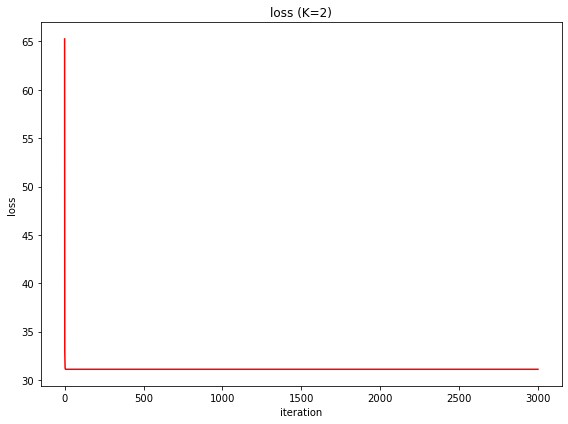

**************************************************
## [RESULT 06]
**************************************************


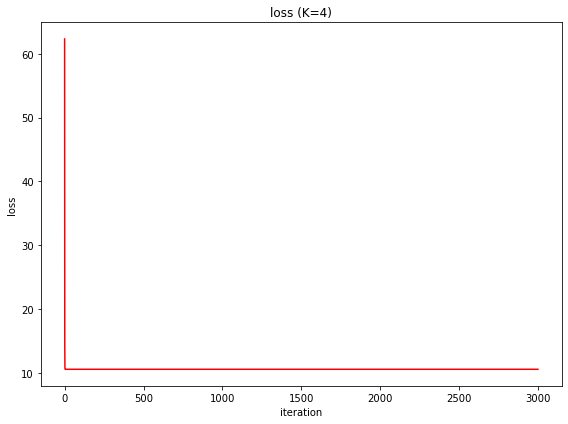

**************************************************
## [RESULT 07]
**************************************************


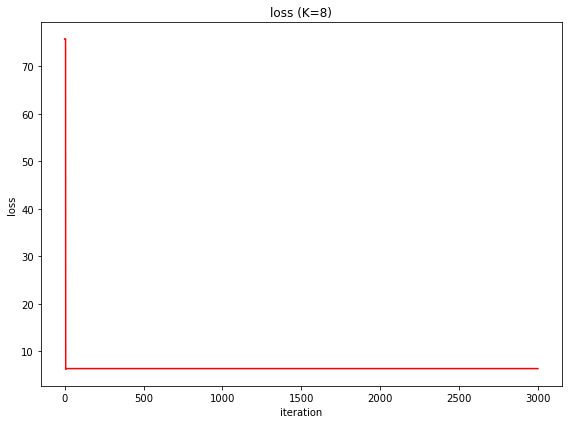

**************************************************
## [RESULT 08]
**************************************************


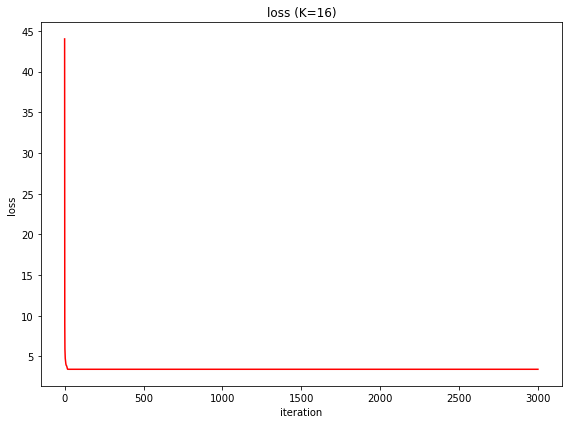

**************************************************
## [RESULT 09]
**************************************************


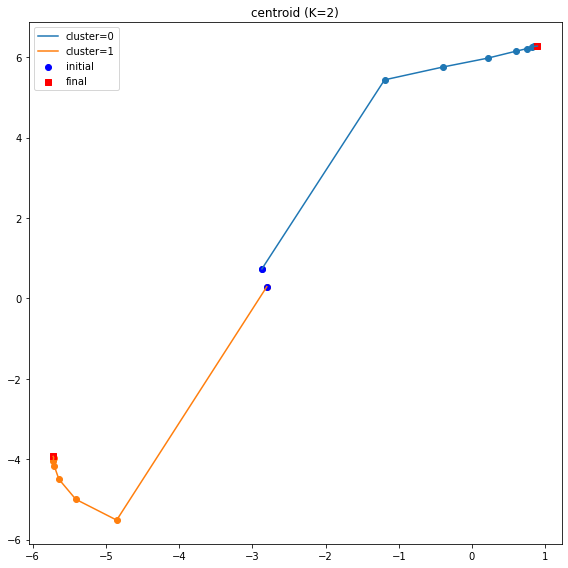

**************************************************
## [RESULT 10]
**************************************************


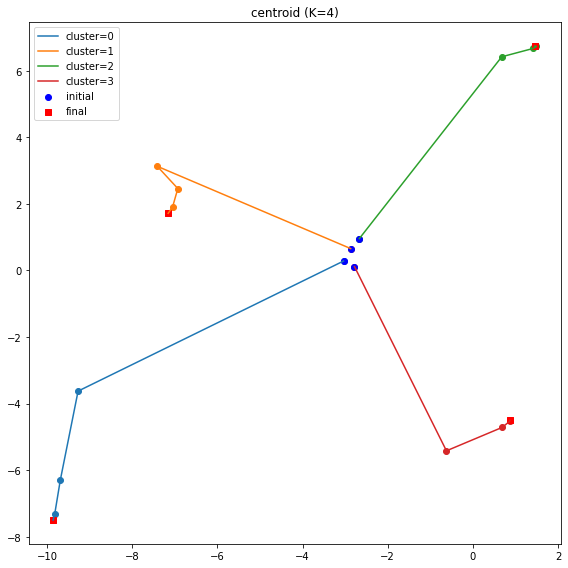

**************************************************
## [RESULT 11]
**************************************************


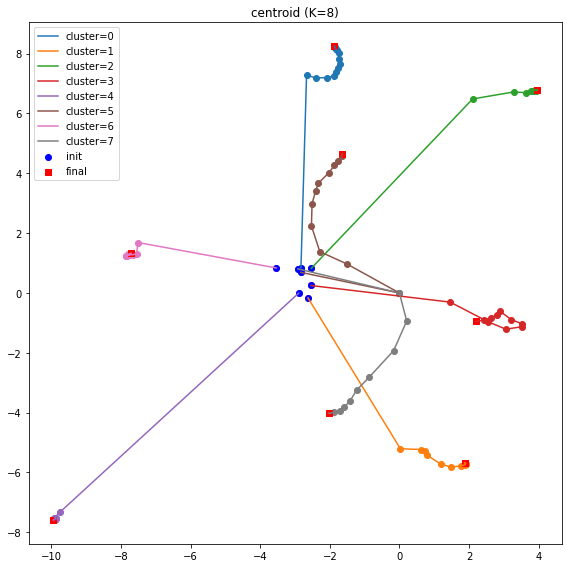

**************************************************
## [RESULT 12]
**************************************************


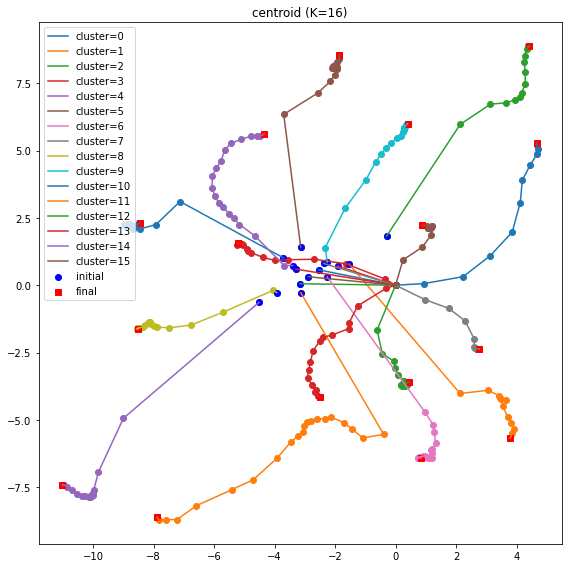

**************************************************
## [RESULT 13]
**************************************************


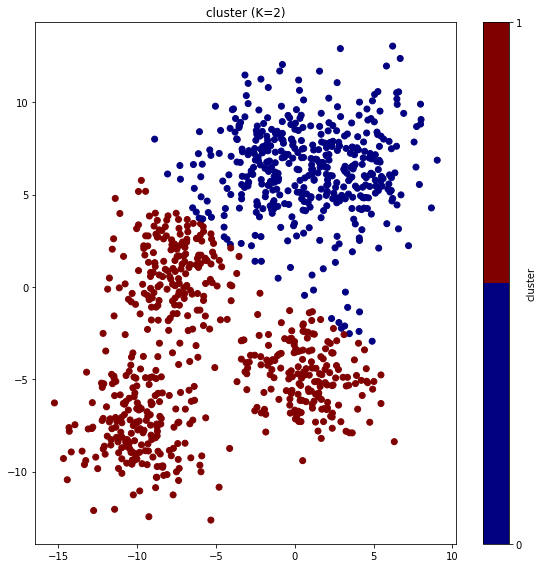

**************************************************
## [RESULT 14]
**************************************************


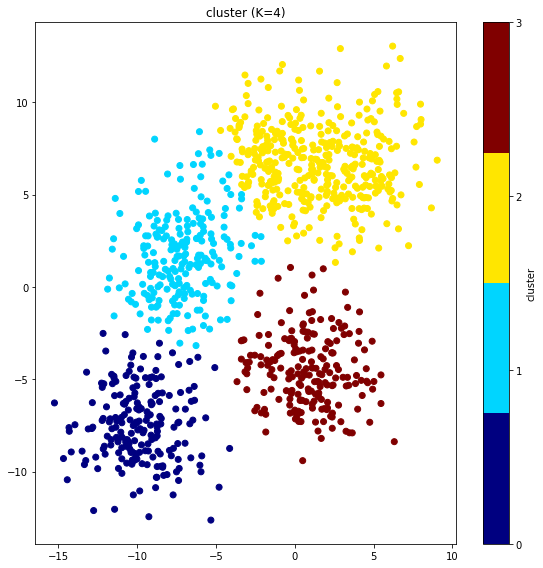

**************************************************
## [RESULT 15]
**************************************************


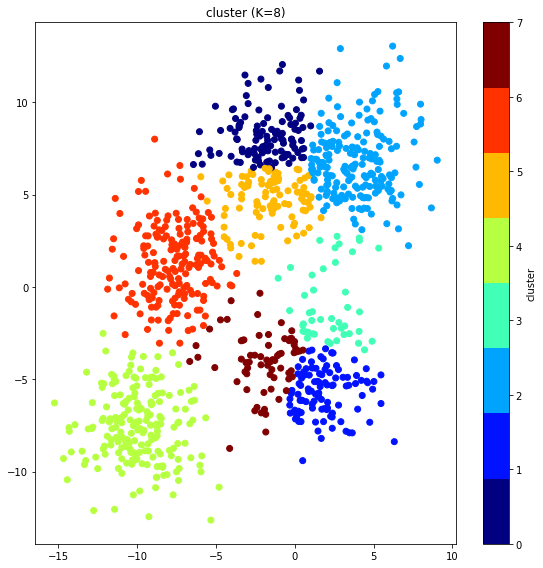

**************************************************
## [RESULT 16]
**************************************************


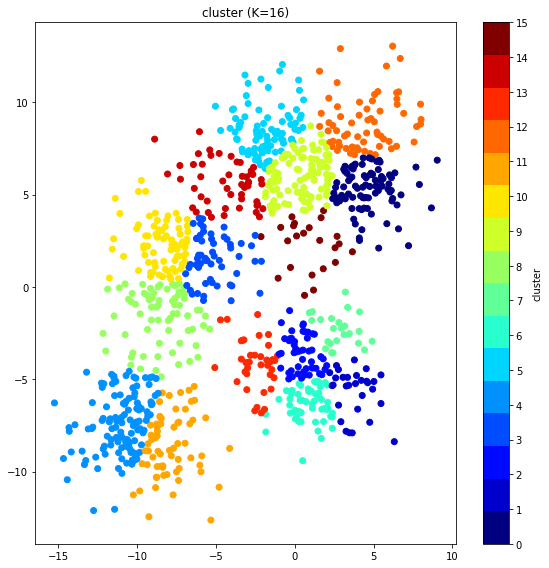

In [725]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)